# Homework Four

**Step 1:** 


Import the necessary modules (numpy, pandas, matplotlib.pyplot) and set jupyter to generate plots inline.

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Step 2:** 

Read in the iris data set and examine the head to make sure the data is in a usable format

In [21]:
irisdata = pd.read_csv('C:/Users/paigebiller/Documents/GitHub/HomeworkThree/iris.txt',\
                   sep=",", header = 0, names = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Species'])

irisdata.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Step 3:** 

Create a new (and reduced) data set consisting of only the PetalLength and PetalWidth columns

In [22]:
reducediris = irisdata.drop(irisdata.columns[[0, 1, 4]], axis=1) #axis=1 represents columns, axis=0 would mean rows

reducediris.head()

,Petal Length,Petal Width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


This newly reduced dataframe (reducediris) contains only the Petal Length and Petal Width columns for each of our 150 observations.

**Step 4:** 

Create a scatter plot of the reduced data set to make sure the data does not have any outliers or anomalies

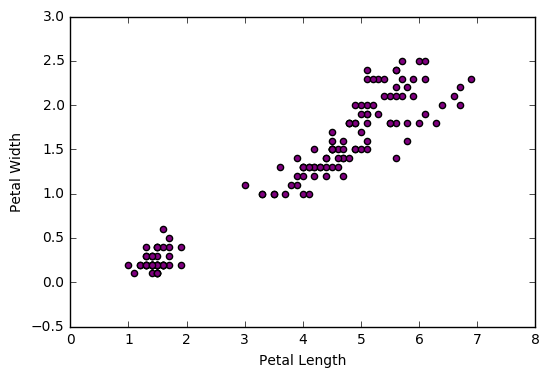

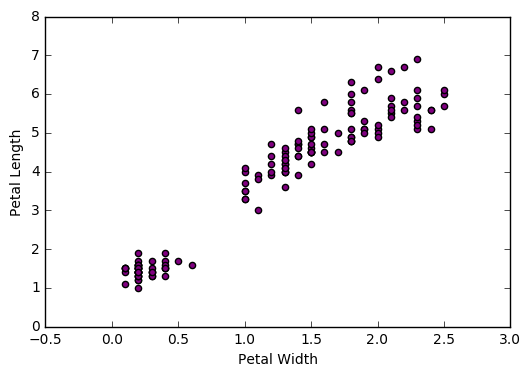

In [23]:
reducediris.plot(kind='scatter', x='Petal Length', y='Petal Width',color='purple');
reducediris.plot(kind='scatter', x='Petal Width', y='Petal Length',color='purple');

Both scatter plots show a direct, positive relationship between Petal Length and Petal Width. 

While there is a "gap" in the data between (0.5, 2) and (1.0,3), the underlying relationship is still fairly consistent and linear, with minimal interference from anomalies or outliers, so we can move forward with the regression calculations.

I have chosen to treat Petal Length as the independent (X) variable and Petal Width as the dependent (Y) variable.

**Step 5:** 

Implement the basic functions to create a regression model

**Part 1:** 
Create a function to calculate the coefficients of a least squares approximation
        
The betacalc function takes two parameters: indepvar and depvar.

In a simple linear regression, indepvar is an array of 1s followed by an array of the independent variable values for each observation in the dataset (150, in this case). The array of 1s represents X to the 0 power, to help us calculate the y-intercept in the regression equation (beta0). The x variable array helps us calculate the beta1 coefficient.

In [24]:
def betacalc(indepvar,depvar):
    beta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(indepvar),indepvar)),np.transpose(indepvar)),depvar)
    return beta

In [25]:
xvar = reducediris['Petal Length'].values #x variable values

In [26]:
unitxarray = np.repeat(1,150) #1 repeated down column of 150 observations

In [27]:
xmatrix = np.column_stack((unitxarray,xvar)) #combine our two arrays to create indepvar parameter

In [28]:
yvar = reducediris['Petal Width'].values #y variable values

**Part 2:** 
Create a function to use the least squares coefficients to predict the value of a given input point
        
The scoreregress function takes in one parameter, a datapoint. Because this is a simple linear regression, the datapoint is simply one x value, used to predict a corresponding y value. In our example, the datapoint would be the Petal Length, combined with each element of the betaarray that we calculated in the betacalc function to calculate the predicted Petal Width.

betaarray[0] represents the y-intercept, with betaarray[1] representing the regression coefficient for Petal Length.

In [29]:
irisbetas=betacalc(xmatrix,yvar) #calculates beta0 and beta1 for the irisdata Petal Length-Petal Width model

print(irisbetas)

[-0.36651405  0.41641913]


For our data, the y-intercept is -0.3665 and the coefficient for Petal Length is 0.4164 (on average, the change in Petal Width for every one-unit change in Petal Length, all else equal).

In [30]:
def scoreregress(betaarray,datapointx):
    predictvar= betaarray[0]+betaarray[1]*datapointx
    return predictvar

predictarray=scoreregress(irisbetas,1.4)

print(predictarray)

0.216472739983


For an example datapoint with a Petal Length of 1.4, evaluating the scoreregress function using the beta0 and beta1 values from the betacalc function we created results in a predicted Petal Width of around 0.216.

When we compare this result to our scatterplot from the previous steps, the results seem reasonable given the input data.

**Step 6:** 

Using your regression model, calculate the points along the regression line of the reduced data set


We will feed in the Petal Length of each observation in the reduced dataframe to the scoreregress function to calculate the predicted Petal Width.

We create an empty array with one row and two columns, to hold the x value and predicted y value (yhat) for each observation in the reducediris dataframe. We loop over each observation and append the results to the yhatarray, deleting the original observation (one row, two column shape). This gives us our final array, with shape (150,2).

In [31]:
yhatarray = np.empty(shape=[1,2])

for x in reducediris['Petal Length']:
    yhat = scoreregress(irisbetas,x)
    yhatarray = np.vstack([yhatarray, [x, yhat]])
    
yhatarray = np.delete(yhatarray,0,0)

yhatarray

array([[ 1.4       ,  0.21647274],
       [ 1.4       ,  0.21647274],
       [ 1.3       ,  0.17483083],
       [ 1.5       ,  0.25811465],
       [ 1.4       ,  0.21647274],
       [ 1.7       ,  0.34139848],
       [ 1.4       ,  0.21647274],
       [ 1.5       ,  0.25811465],
       [ 1.4       ,  0.21647274],
       [ 1.5       ,  0.25811465],
       [ 1.5       ,  0.25811465],
       [ 1.6       ,  0.29975657],
       [ 1.4       ,  0.21647274],
       [ 1.1       ,  0.091547  ],
       [ 1.2       ,  0.13318891],
       [ 1.5       ,  0.25811465],
       [ 1.3       ,  0.17483083],
       [ 1.4       ,  0.21647274],
       [ 1.7       ,  0.34139848],
       [ 1.5       ,  0.25811465],
       [ 1.7       ,  0.34139848],
       [ 1.5       ,  0.25811465],
       [ 1.        ,  0.04990509],
       [ 1.7       ,  0.34139848],
       [ 1.9       ,  0.42468231],
       [ 1.6       ,  0.29975657],
       [ 1.6       ,  0.29975657],
       [ 1.5       ,  0.25811465],
       [ 1.4       ,

**Step 7:** 

Plot the regression line on top of a scatter plot of the reduced data set (you will need to remove duplicate X values to get matplotlib to draw an actual line)

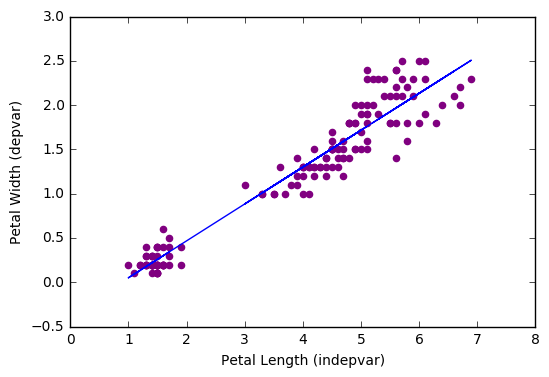

In [36]:
yhat = pd.DataFrame(data=yhatarray[0:,0:])
yhat = yhat.drop_duplicates()

plt.scatter(reducediris['Petal Length'], reducediris['Petal Width'],color='purple')
plt.plot(yhat[0],yhat[1])
plt.xlabel("Petal Length (indepvar)")
plt.ylabel("Petal Width (depvar)")
plt.show()

Our final output shows that the regression line is fitted well to the data, showing a positive, direct correlation between Petal Length and Petal Width with the added detail of the slope of ~.416 and a y-intercept of -0.367. 

We can use these coefficients to predict the Petal Width of a given iris flower, given its Petal Length, for the species in the scope of the data we used to create the model. 

We should be careful not to extrapolate to species or measurements widely outside the scope of the input dataset for prediction.